# Credit Card Fraud

 https://www.kaggle.com/dmirandaalves/predict-chargeback-frauds-payment

## Initialization

In [2]:
# Importing verticapy
import verticapy as vp
# Creating a connection
vp.new_connection({"host": "10.211.55.14", 
                   "port": "5433", 
                   "database": "testdb", 
                   "password": "XxX", 
                   "user": "dbadmin"},
                   name = "VerticaDSN")

In [2]:
vp.__version__

'0.9.0'

In [3]:
from verticapy.utilities import create_schema, drop
drop("credit_card_fraud", method="schema")
create_schema("credit_card_fraud")

True

## Data Ingestion

The table "credit_card_fraud"."transactions" has been successfully created.


,AbcCardNumberVarchar(80),📅DateTimestamp,123AmountFloat,010FraudBoolean
1,536518******2108,2015-05-01 00:01:54,36.54,❌
2,536518******2108,2015-05-01 00:03:46,36.54,❌
3,453211******1239,2015-05-01 00:08:50,69.0,❌
4,548827******1705,2015-05-01 00:27:00,193.43,❌
5,531681******9778,2015-05-01 01:32:46,132.0,❌
6,515117******4107,2015-05-01 02:10:26,161.0,❌
7,432032******9111,2015-05-01 08:09:15,110.0,❌
8,544540******7141,2015-05-01 08:30:16,159.5,❌
9,554906******0358,2015-05-01 09:13:51,126.5,✅
10,554906******0358,2015-05-01 09:15:28,126.5,✅

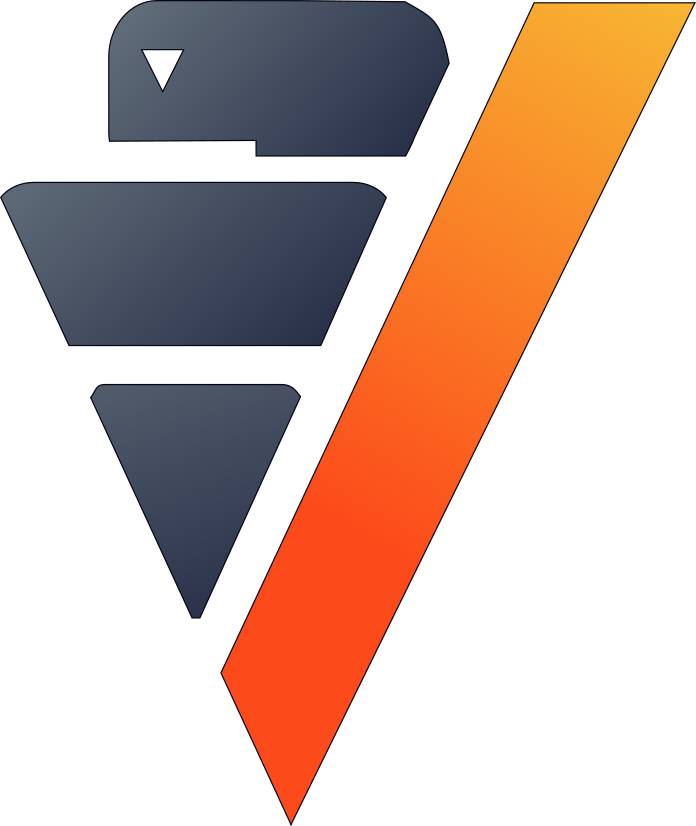

In [5]:
from verticapy.utilities import read_csv

# Data Ingestion
vdf = read_csv('credit_card_fraud.csv', 
               table_name = "transactions", 
               schema = "credit_card_fraud",
               dtype = {"Row": "int",
                        "CardNumber": "varchar",
                        "Date": "datetime",
                        "Amount": "float",
                        "Fraud": "bool"})

# Dropping the index
vdf["row"].drop()

# Displaying the vDataFrame
display(vdf)

### Data Exploration

,count,mean,std,min,25%,50%,75%,max,unique
"""Amount""",11127,129.559921811809,141.423095045676,1.0,55.0,99.0,154.0,2920.0,511.0
"""Fraud""",11127,0.0514064887211287,0.22083533347947,0.0,0.0,0.0,0.0,1.0,2.0

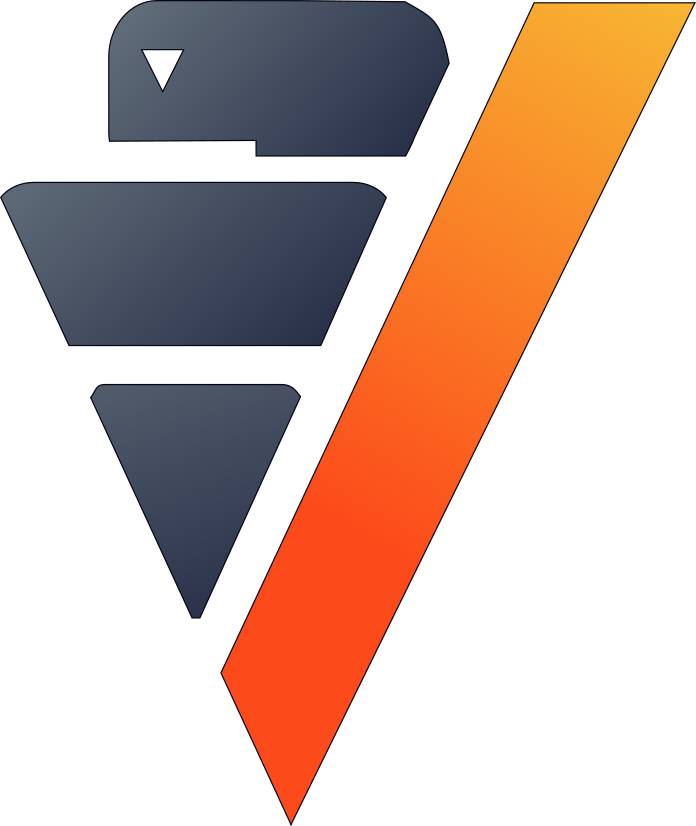

<AxesSubplot:xlabel='Density', ylabel='"Fraud"'>

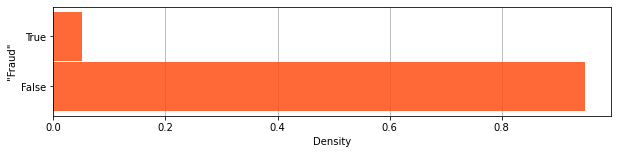

In [6]:
# We have more than 10 000 card operation  
# 5% are flagged fraud 
display(vdf.describe())
vdf["Fraud"].bar()

### Data Preparation

,AbcCardNumberVarchar(80),📅DateTimestamp,123AmountFloat,010FraudBoolean,123zscoreFloat,123elapseFloat,123hourInteger,123nb_transaction_30Integer,123nb_transaction_60Integer,123avg_transaction_30Float,123avg_transaction_60Float
1,400217******1137,2015-05-06 09:37:46,198.0,❌,0.0,2250170.0,9,1,1,198.0,198.0
2,400217******1353,2015-05-27 23:37:20,172.5,✅,0.0,2250170.0,23,1,1,172.5,172.5
3,400217******1353,2015-05-27 23:38:58,172.5,✅,0.0,98.0,23,2,2,172.5,172.5
4,400217******1353,2015-05-27 23:40:15,172.5,✅,0.0,77.0,23,3,3,172.5,172.5
5,400217******1353,2015-05-27 23:41:38,172.5,✅,0.0,83.0,23,4,4,172.5,172.5
6,400217******1353,2015-05-27 23:43:12,172.5,✅,0.0,94.0,23,5,5,172.5,172.5
7,400217******1353,2015-05-27 23:44:52,172.5,✅,0.0,100.0,23,6,6,172.5,172.5
8,400217******1353,2015-05-27 23:46:15,172.5,✅,0.0,83.0,23,7,7,172.5,172.5
9,400217******1353,2015-05-27 23:47:29,172.5,✅,0.0,74.0,23,8,8,172.5,172.5
10,400217******1637,2015-05-16 09:14:05,715.0,❌,0.0,2250170.0,9,1,1,715.0,715.0

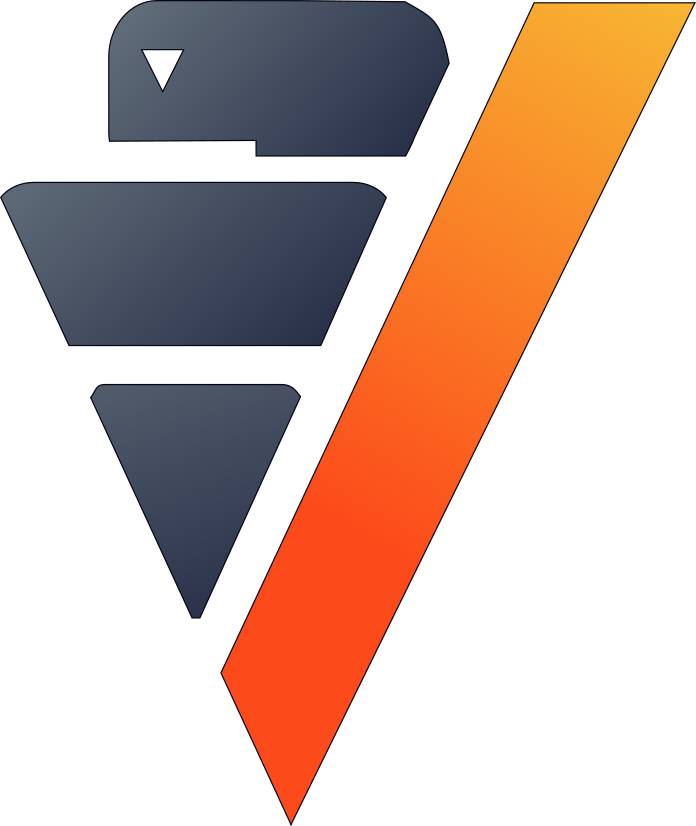

In [7]:
# Computing the amount ZSCORE
vdf["zscore"]  = (vdf["Amount"] - st.avg(vdf["Amount"])._over(["CardNumber"]))
vdf["zscore"]  = st.case_when(st.std(vdf["Amount"])._over(["CardNumber"]) == 0, 0,
                              vdf["zscore"] / st.std(vdf["Amount"])._over(["CardNumber"]))
vdf["zscore"] = st.case_when(vdf["zscore"] != vdf["zscore"], 0, vdf["zscore"])

# Computing the number of seconds elapsed since the last transaction
vdf["elapse"] = (vdf["date"] - st.lag(vdf["date"])._over(["CardNumber"], ["date"])) / st.interval("1 second")

# Imputing the missing values with the maximum
vdf["elapse"] = st.coalesce(vdf["elapse"], vdf["elapse"].max())

# Creating the hour as a feature
vdf["hour"] = st.hour(vdf["date"])

# Computing the number of transaction the last 30 minutes / 1 hour
vdf["nb_transaction_30"] = """COUNT(*) OVER (PARTITION BY CardNumber 
                                             ORDER BY date 
                                             RANGE BETWEEN '30 minutes' PRECEDING 
                                                       AND  '0 minutes' FOLLOWING)"""
vdf["nb_transaction_60"] = """COUNT(*) OVER (PARTITION BY CardNumber 
                                             ORDER BY date 
                                             RANGE BETWEEN '60 minutes' PRECEDING 
                                                       AND  '0 minutes' FOLLOWING)"""

# Computing the avg amount of transaction the last 30 minutes / 1 hour
vdf["avg_transaction_30"] = """AVG(Amount) OVER (PARTITION BY CardNumber 
                                                 ORDER BY date 
                                                 RANGE BETWEEN '30 minutes' PRECEDING 
                                                           AND  '0 minutes' FOLLOWING)"""
vdf["avg_transaction_60"] = """AVG(Amount) OVER (PARTITION BY CardNumber 
                                                 ORDER BY date 
                                                 RANGE BETWEEN '60 minutes' PRECEDING 
                                                           AND  '0 minutes' FOLLOWING)"""

vdf

### Correlations

,"""Fraud"""
"""Fraud""",1
"""nb_transaction_30""",0.519338816009019
"""nb_transaction_60""",0.516603663394052
"""elapse""",-0.369650216236001
"""Amount""",0.0884607312994057
"""avg_transaction_30""",0.0732393669484762
"""avg_transaction_60""",0.0727213816441735
"""hour""",-0.0125255587343887
"""zscore""",0.00854724482472918

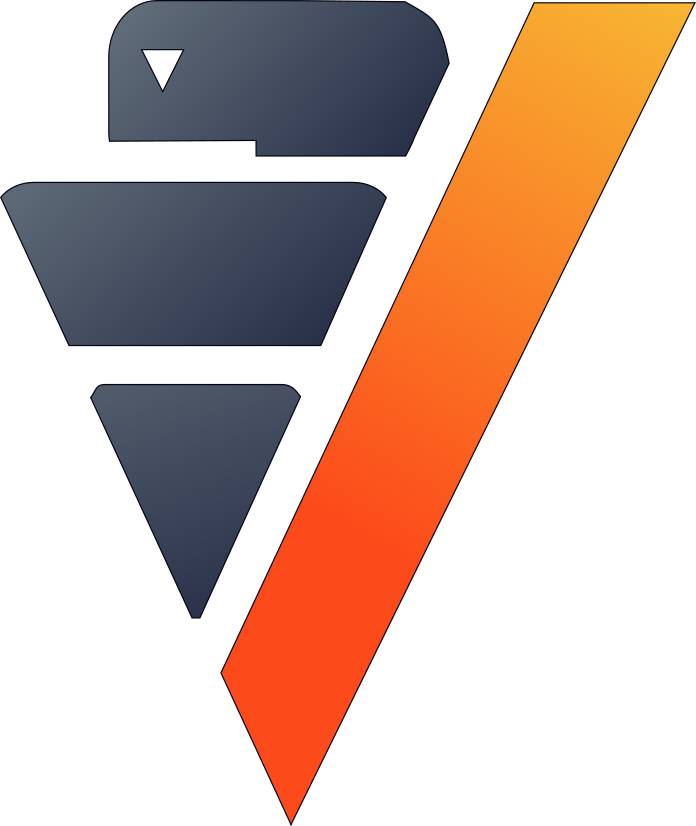

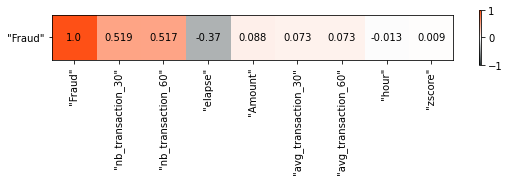

In [8]:
vdf.corr(focus='fraud', method='biserial')

In [9]:
vdf.corr_pvalue('fraud', 'nb_transaction_60', method = 'biserial')

(0.516603663394052, 0.0)

In [10]:
vdf.corr_pvalue('fraud', 'elapse', method = 'biserial')

(-0.369650216236001, 0.0)

,AbcCardNumberVarchar(80),📅DateTimestamp,123AmountFloat,010FraudBoolean,123zscoreFloat,123elapseFloat,123hourInteger,123nb_transaction_30Integer,123avg_transaction_30Float
1,400217******1137,2015-05-06 09:37:46,198.0,❌,0.0,2250170.0,9,1,198.0
2,400217******1353,2015-05-27 23:37:20,172.5,✅,0.0,2250170.0,23,1,172.5
3,400217******1353,2015-05-27 23:38:58,172.5,✅,0.0,98.0,23,2,172.5
4,400217******1353,2015-05-27 23:40:15,172.5,✅,0.0,77.0,23,3,172.5
5,400217******1353,2015-05-27 23:41:38,172.5,✅,0.0,83.0,23,4,172.5
6,400217******1353,2015-05-27 23:43:12,172.5,✅,0.0,94.0,23,5,172.5
7,400217******1353,2015-05-27 23:44:52,172.5,✅,0.0,100.0,23,6,172.5
8,400217******1353,2015-05-27 23:46:15,172.5,✅,0.0,83.0,23,7,172.5
9,400217******1353,2015-05-27 23:47:29,172.5,✅,0.0,74.0,23,8,172.5
10,400217******1637,2015-05-16 09:14:05,715.0,❌,0.0,2250170.0,9,1,715.0

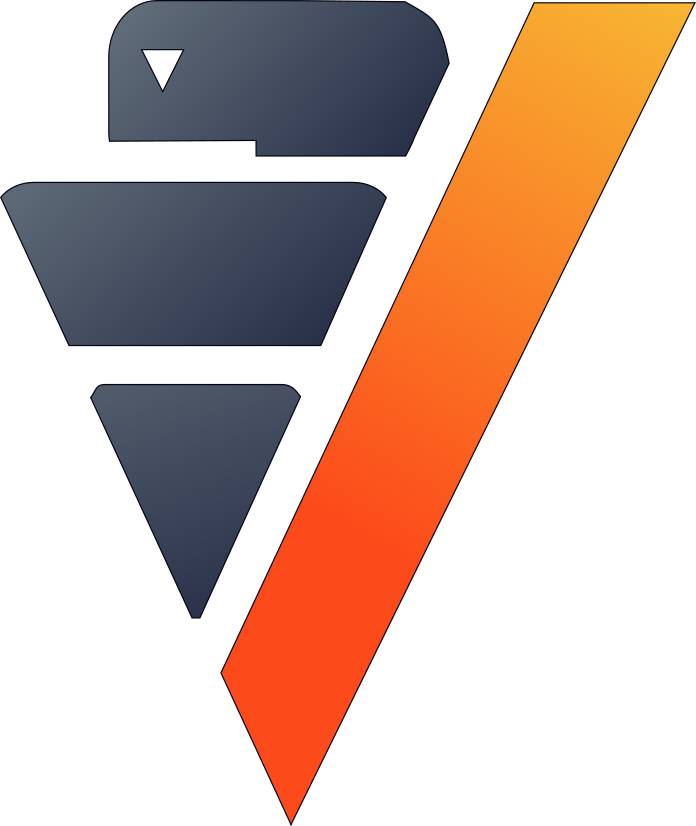

In [11]:
vdf.drop(["nb_transaction_60", "avg_transaction_60"])

### Machine Learning

In [12]:
# Converting the boolean response to int
vdf["fraud"].astype("int")

# importing the Random Forest Classifier Algorithm
from verticapy.learn.ensemble import RandomForestClassifier

# Seeding the Randomness
from verticapy.utilities import set_option
set_option("random_state", 1)

# Spliting data into Train and Test
train, test = vdf.train_test_split(test_size = 0.33 , random_state=1)

# Creating the model
model = RandomForestClassifier("credit_card_fraud.rf",
                               n_estimators = 100, 
                               sample = 0.75, 
                               max_depth = 10, 
                               min_samples_leaf = 4, 
                               max_leaf_nodes= 3000,
                               nbins = 100)
model.fit(train, 
          ["nb_transaction_30",
           "avg_transaction_30",
           "elapse", 
           "amount", 
           "hour",
           "zscore"],
          "fraud",
          test)

# Evaluating the model
model.score("auc")

0.8853984837957065

,importance,sign
nb_transaction_30,67.38,1
zscore,13.58,1
amount,7.57,1
hour,5.31,1
avg_transaction_30,3.64,1
elapse,2.53,1

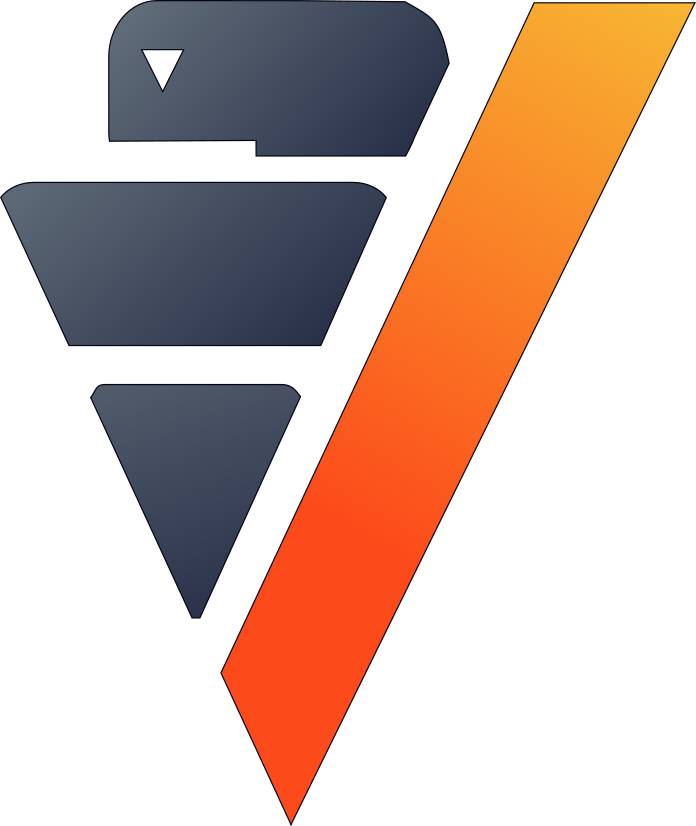

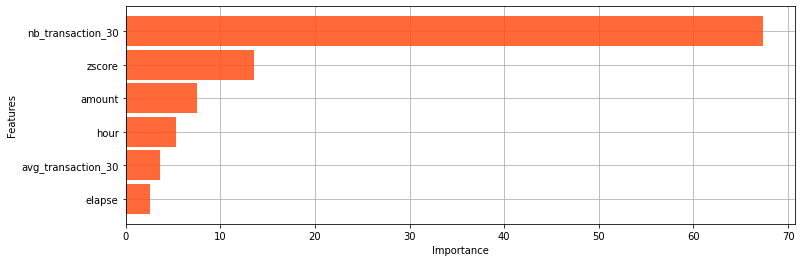

In [13]:
model.features_importance()

0.045

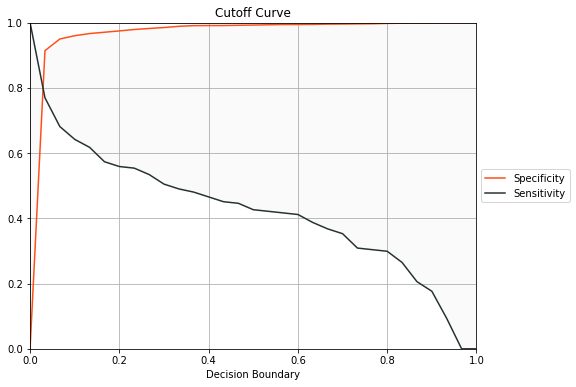

In [14]:
# Getting a good cutoff
model.cutoff_curve()
model.score("best_cutoff")

,0,1
0,3250,221
1,50,154

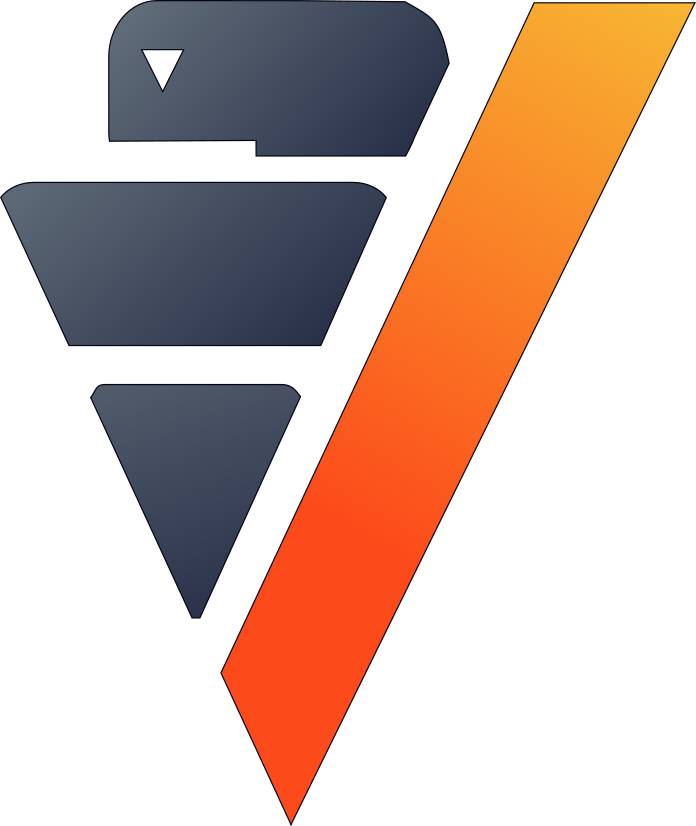

In [15]:
model.confusion_matrix(cutoff=0.045)

,0,1
0,2993,478
1,41,163

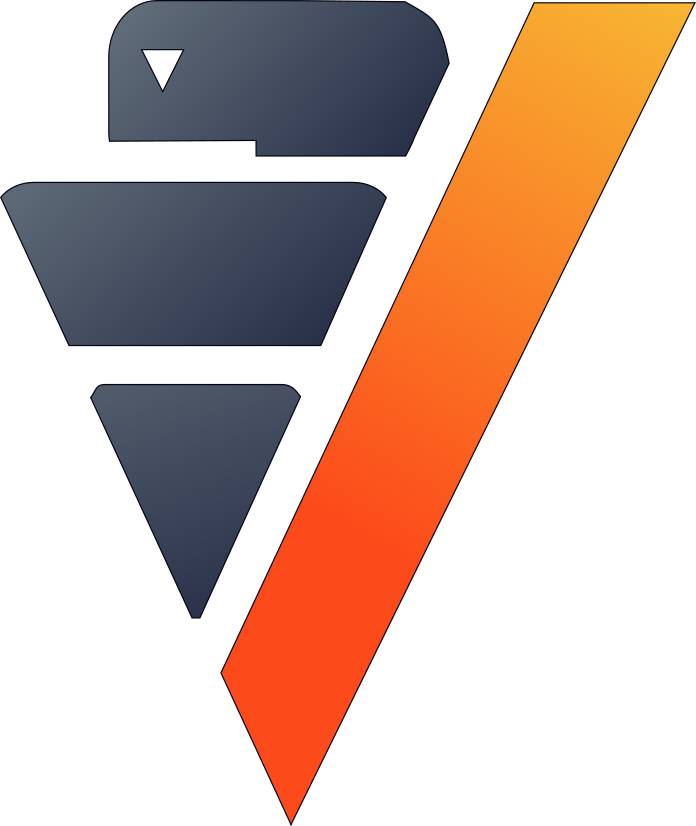

In [16]:
model.confusion_matrix(cutoff=0.02)

In [17]:
print(model.to_python(return_str=True))

def predict(X):
	import numpy as np
	n = 100
	classes = np.array(['0', '1'])
	tree_list = []
	tree_list += [[[1, 3, 5, 7, 9, 11, 13, None, None, None, 15, 17, 19, 21, 23, None, None, None, 25, 27, 29, None, None, 31, 33, 35, None, 37, 39, 41, 43, 45, None, None, None, None, None, 47, None, 49, None, None, None, None, None, 51, None, 53, None, 55, None, None, 57, 59, None, None, 61, None, None, None, None, 63, 65, None, None, None, None], [2, 4, 6, 8, 10, 12, 14, None, None, None, 16, 18, 20, 22, 24, None, None, None, 26, 28, 30, None, None, 32, 34, 36, None, 38, 40, 42, 44, 46, None, None, None, None, None, 48, None, 50, None, None, None, None, None, 52, None, 54, None, 56, None, None, 58, 60, None, None, 62, None, None, None, None, 64, 66, None, None, None, None], [5, 4, 0, 4, 3, 0, 5, None, None, None, 4, 3, 3, 1, 3, None, None, None, 5, 4, 3, None, None, 4, 0, 3, None, 1, 4, 5, 5, 4, None, None, None, None, None, 3, None, 2, None, None, None, None, None, 1, None, 4, None, 3, None, N